# 机器学习 Homework 1
**吴博成 2193211134**

In [1]:
import numpy as np
from sklearn import datasets
from sklearn import model_selection
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt

# section 1 : 随机生成一个由1000个样本组成的分类数据集，特征数为4，共包含两个类别

In [2]:
all_data = datasets.make_classification(n_samples=1000, n_features=4,n_classes=2)
x = all_data[0]
y = np.transpose([all_data[1]])
save_data = np.hstack((x,y))
header=["x1","x2","x3","x4","y"]
np.savetxt("all_data.csv", save_data, delimiter=",",header = "x1,x2,x3,x4,y")# 将数据写入csv
print(save_data)

[[-0.0698024   0.2899721  -0.35414498 -0.24710857  0.        ]
 [-0.35007957 -0.86696391 -0.55763914  1.02642331  0.        ]
 [-0.5349624  -2.00157726 -0.49688743  2.22906495  1.        ]
 ...
 [-0.27853567  2.45293764 -2.09339257 -2.25090664  0.        ]
 [ 0.40079584 -0.13860146  1.2322078  -0.07101113  1.        ]
 [ 0.33759973  0.42895949  0.75145885 -0.59247031  1.        ]]


# section 2 : 构造训练集和测试集

In [3]:
[x_train,x_test,y_train,y_test] = model_selection.train_test_split(x,y,test_size=0.2)
train_data = np.hstack((x_train,y_train))
test_data = np.hstack((x_test,y_test))
np.savetxt("train_data.csv", train_data, delimiter=",",header = "x1,x2,x3,x4,y")
np.savetxt("test_data.csv", test_data, delimiter=",",header = "x1,x2,x3,x4,y")
print(train_data)
print(test_data)

[[-0.21050838 -1.00414988 -0.08186415  1.08848826  0.        ]
 [-0.19804432  2.08888161 -1.66943683 -1.93698771  0.        ]
 [-0.20805324  1.42539637 -1.35010707 -1.28421817  0.        ]
 ...
 [-0.43661901 -0.78684487 -0.85004375  0.99276398  0.        ]
 [-0.35033545 -0.88874978 -0.54694326  1.04781987  0.        ]
 [-0.43392907 -1.90420449 -0.25572486  2.08201695  1.        ]]
[[ 2.82543174e-01 -8.03017805e-01  1.23889090e+00  6.38382526e-01
   1.00000000e+00]
 [-2.17434906e-01  5.85594124e-01 -9.36408399e-01 -4.59671185e-01
   0.00000000e+00]
 [-3.40670710e-01 -8.49792927e-01 -5.39434079e-01  1.00482004e+00
   0.00000000e+00]
 [-4.88389625e-03  3.28419206e-01 -1.86526076e-01 -3.18051092e-01
   0.00000000e+00]
 [-3.44014742e-01  2.34993471e+00 -2.22874574e+00 -2.11666363e+00
   0.00000000e+00]
 [ 4.82153350e-01  7.20631968e-01  1.01652606e+00 -9.51572051e-01
   1.00000000e+00]
 [-8.74473485e-02  1.20343107e+00 -8.84692953e-01 -1.12963960e+00
   0.00000000e+00]
 [-7.04252129e-01 -6.

# section 3 : 在训练集上训练得到一个决策树模型tree_clf，并使用tree_clf的predict函数预测测试样本的分类结果

In [4]:
tree_clf = tree.DecisionTreeClassifier()
tree_clf = tree_clf.fit(x_train,y_train)
prediction = tree_clf.predict(x_test)
print("预测值:{}".format(prediction))

预测值:[1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1
 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0
 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1
 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1]


# section 4 : 使用score函数获得决策树模型tree_clf的精度

In [5]:
score = tree_clf.score(x_test,y_test)
print("精度:{}".format(score))

精度:0.98


# section 5 : 混淆矩阵、查准率、查全率和f1值

In [6]:
print("混淆矩阵:{}".format(metrics.confusion_matrix(y_true = y_test, y_pred = prediction)))
print("查准率:{}".format(metrics.precision_score(y_true = y_test, y_pred = prediction)))
print("查全率:{}".format(metrics.recall_score(y_true = y_test, y_pred = prediction)))
print("f1值:{}".format(metrics.f1_score(y_true = y_test, y_pred = prediction)))

混淆矩阵:[[99  3]
 [ 1 97]]
查准率:0.97
查全率:0.9897959183673469
f1值:0.9797979797979798


# section 6 : 画出ROC曲线

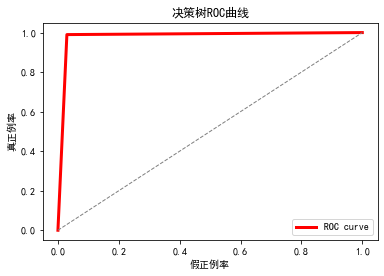

In [7]:
fpr,tpr,threshold = metrics.roc_curve(y_true = y_test, y_score = prediction)
plt.figure()
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(fpr, tpr, color='red',
        lw=3, label='ROC curve')
plt.plot([0, 1], [0, 1], color = 'gray', lw=1, linestyle='--')
plt.xlabel('假正例率')
plt.ylabel('真正例率')
plt.title('决策树ROC曲线')
plt.legend(loc="lower right")
plt.show()